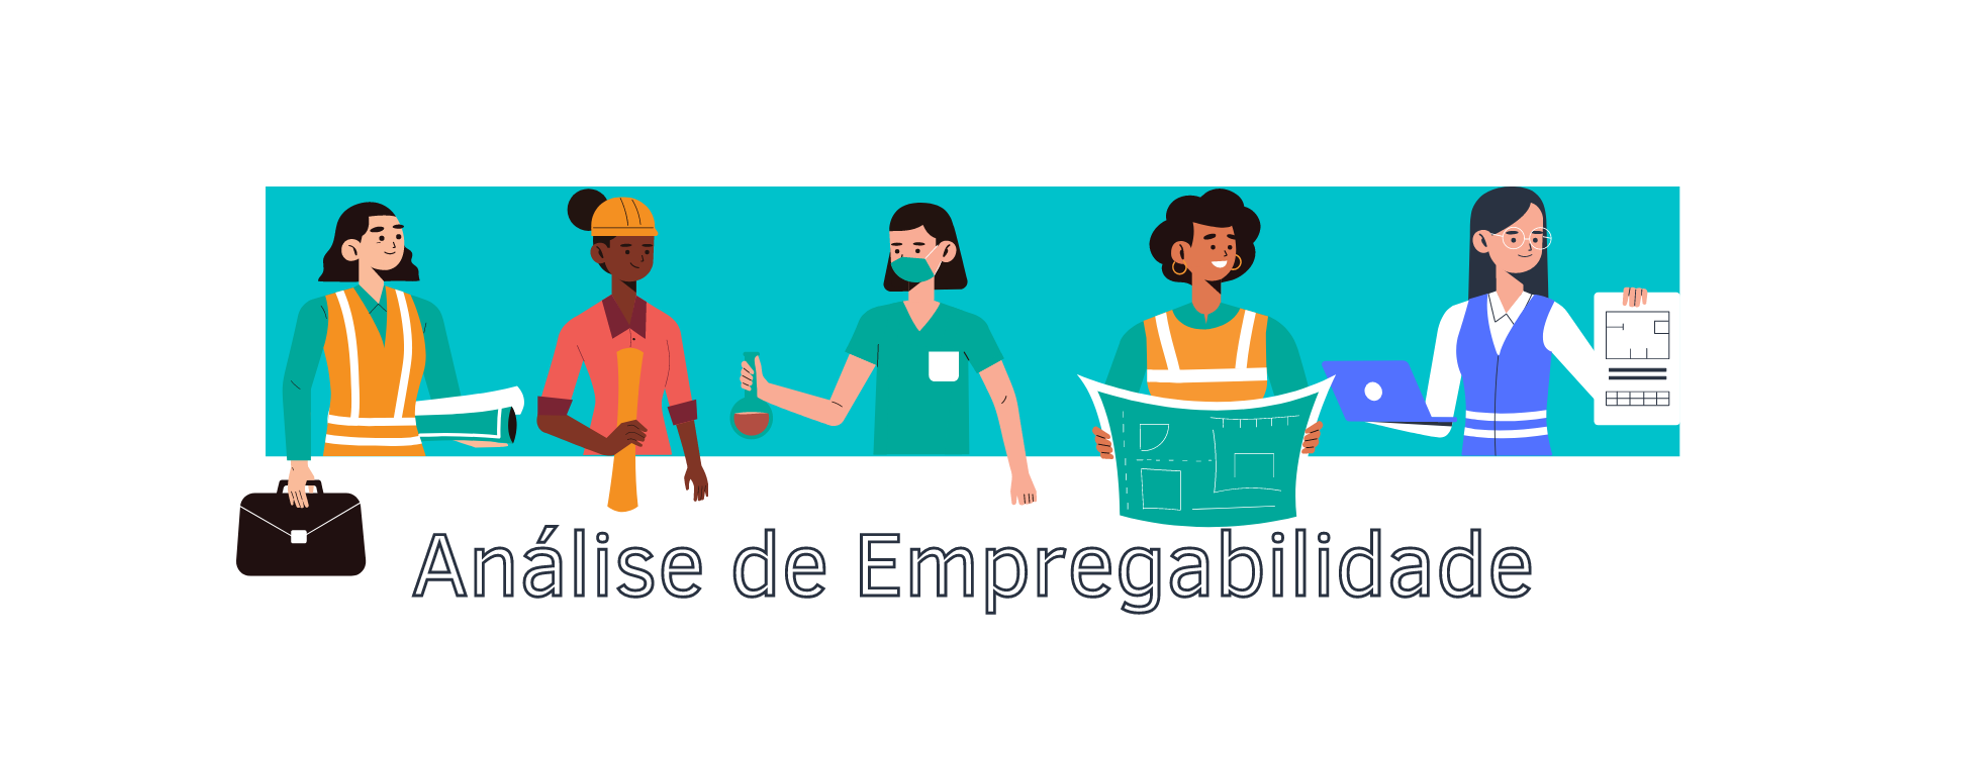

<div align="center">

<strong>Autora</strong><br>

Bruna Larissa Clemente Gomes <br>

<strong>Professor Orientador</strong><br>

Fernando Masanori Ashikaga

<strong>Cliente Final</strong><br>

<img src="http://www.vanguarda.tv/img/logo1.jpg" width="200px">



</div>

In [ ]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
#windows-1251
dados = pd.read_csv('CAGEDEST_122018.txt', encoding='windows-1252', sep=';', low_memory=False, decimal=",")

In [ ]:
grau_instrucao = pd.read_csv('grau_instrucao.csv', encoding='latin')

In [ ]:
grau_instrucao

,descricao,codigo
0,Analfabeto,1
1,Até 5ª Incompleto,2
2,5ª Completo Fundamental,3
3,6ª a 9ª Fundamental,4
4,Fundamental Completo,5
5,Médio Incompleto,6
6,Médio Completo,7
7,Superior Incompleto,8
8,Superior Completo,9
9,MESTRADO,10


In [ ]:
raca_cor = pd.read_csv('raca_cor.csv', encoding='latin', sep=";")

In [ ]:
raca_cor

,raca cor,codigo
0,INDIGENA,1
1,BRANCA,2
2,PRETA,4
3,AMARELA,6
4,PARDA,8
5,NAO IDENT,9
6,IGNORADO,-1


In [ ]:
Sexo = pd.read_csv('sexo.txt', encoding='latin', sep=";")

In [ ]:
Sexo

,Sexo,Categoria
0,Masculino,1
1,Feminino,2


In [ ]:
dados.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [ ]:
dados.tail()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
2256747,2,201812,221100,2018,252405,91995,94308,9430800,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256748,2,201812,221100,2018,514120,91995,94308,9430800,6,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256749,2,201812,221100,2018,422110,85138,86305,8630503,1,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256750,2,201812,221100,2018,422315,66303,65502,6550200,6,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256751,2,201812,220770,2018,231105,80144,85121,8512100,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0


In [ ]:
dados.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

In [ ]:
dados.describe()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente
count,2.256752e+06,2256752.0,2.256752e+06,2256752.0,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,...,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.574103e+00,201812.0,3.553863e+05,2018.0,5.368213e+05,5.304958e+04,5.126839e+04,5.126847e+06,4.303066e+00,6.595547e+00,...,1.318030e+01,1.084850e+00,1.553693e-02,6.216255e+00,3.534381e+01,7.773592e-01,3.540988e+03,3.537022e+04,4.852106e-03,5.339089e-03
std,4.944784e-01,0.0,8.300073e+04,0.0,1.784826e+05,2.269392e+04,2.468035e+04,2.468034e+06,2.646710e+00,1.548538e+00,...,3.413455e+01,4.031142e-01,2.154446e-01,9.922202e+00,8.311311e+00,8.125151e+01,8.309257e+02,8.310356e+03,6.948788e-02,7.287376e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147000e+05,2018.0,4.141050e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.531500e+05,2018.0,5.174100e+05,5.241800e+04,4.773300e+04,4.773300e+06,4.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.117900e+05,2018.0,7.152100e+05,7.412800e+04,7.490100e+04,7.490102e+06,6.000000e+00,7.000000e+00,...,1.100000e+01,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,5.990000e+02,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


In [ ]:
dados.shape

(2256752, 42)

## Salário Mensal

A variável salário mensal é do tipo float64


In [ ]:
dados['Salário Mensal']

0            954.0
1           2500.0
2              0.0
3              0.0
4              0.0
5              0.0
6              0.0
7           1061.0
8              0.0
9              0.0
10             0.0
11          1061.0
12          1061.0
13          1061.0
14          1026.0
15          1061.0
16          1061.0
17          1700.0
18          1026.0
19          1061.0
20          1026.0
21          5000.0
22          1000.0
23          2123.0
24          2123.0
25          1200.0
26           991.0
27          1061.0
28          1061.0
29          1061.0
            ...   
2256722      972.0
2256723     1099.0
2256724      990.0
2256725     3000.0
2256726     1021.0
2256727     5475.0
2256728     5798.0
2256729    10849.0
2256730    16079.0
2256731     1281.0
2256732     1074.0
2256733     1074.0
2256734     3066.0
2256735     1043.0
2256736     1043.0
2256737     3615.0
2256738     1043.0
2256739      999.0
2256740     1005.0
2256741     1033.0
2256742     1043.0
2256743     

In [ ]:
type(dados['Salário Mensal'])

pandas.core.series.Series

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

CRIANDO UM NOVO DF APENAS COM AS VARIAVEIS DE ESTUDO. 

Realizamos então a criação de um df (dados_estudo, apenas com as variaveis de Salario, Raça Cor , Idade, Grau de instrução e Sexo para realizarmos então as transformaçoes. 

In [ ]:
dados_estudo = dados[['Salário Mensal','Idade','Raça Cor','Grau Instrução','Sexo']]

In [ ]:
dados_estudo.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Salário Mensal,Idade,Raça Cor,Grau Instrução,Sexo,Salario_Normalizado,Idade_Normalizada
Salário Mensal,1.0,0.15,-0.078,0.18,-0.042,0.48,0.16
Idade,0.15,1.0,-0.037,-0.11,-0.066,0.24,0.97
Raça Cor,-0.078,-0.037,1.0,-0.063,-0.059,-0.12,-0.026
Grau Instrução,0.18,-0.11,-0.063,1.0,0.21,0.17,-0.079
Sexo,-0.042,-0.066,-0.059,0.21,1.0,-0.12,-0.064
Salario_Normalizado,0.48,0.24,-0.12,0.17,-0.12,1.0,0.28
Idade_Normalizada,0.16,0.97,-0.026,-0.079,-0.064,0.28,1.0


# SALARIO MENSAL 

Começando os estudos, com a primeira distribuição:

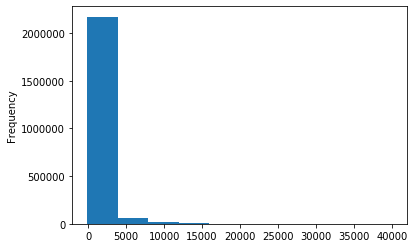

In [ ]:
dados_estudo['Salário Mensal'].plot.hist(range=(-100, 40000))

In [ ]:
x = dados_estudo['Salário Mensal']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão valor min e maximo da variavel estudada
print ("Media:",mu, "Desvio Padrão:",std)
print("Salário Min:", dados_estudo['Salário Mensal'].min())
print("Salário máximo:", dados_estudo['Salário Mensal'].max())

Media: 1627.2442231135722 Desvio Padrão: 2097.520081974266
Salário Min: 0.0
Salário máximo: 142830.0


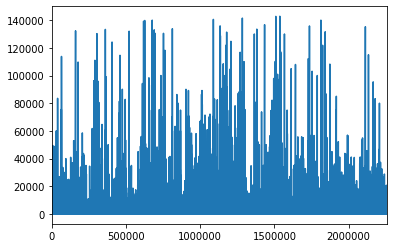

In [ ]:
dados_estudo['Salário Mensal'].plot()


In [ ]:
# fazendo o teste de normalidade de shapiro

stats.shapiro(dados_estudo['Salário Mensal'])


(0.2637892961502075, 0.0)

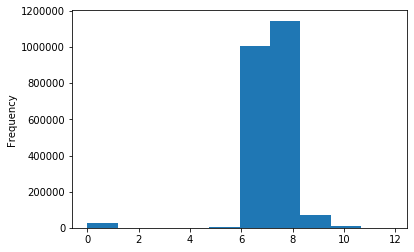

In [ ]:
dados_estudo['log_salario_mensal'] = np.log1p(dados_estudo['Salário Mensal'])
dados_estudo['log_salario_mensal'].plot.hist(bins=10)

In [ ]:
resultado_normal = stats.shapiro(dados_estudo['log_salario_mensal'])
resultado_normal 

(0.5028517246246338, 0.0)

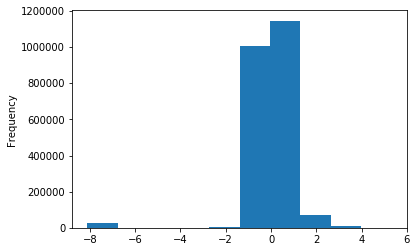

In [ ]:
dados_estudo['log_salario_mensal'] = ( dados_estudo['log_salario_mensal']- dados_estudo['log_salario_mensal'].mean() ) / dados_estudo['log_salario_mensal'].std()
dados_estudo['log_salario_mensal'].plot.hist(bins=10)

In [ ]:
# verificando os dados
dados_estudo.head()

,Salário Mensal,Idade,Raça Cor,Grau Instrução,Salario_Normalizado,Idade_Normalizada,Escolaridade,Sexo,Categoria,raca cor,log_salario,salario_normalizado,log_salario_mensal
0,954.0,24,8,6,-1.324958,-0.601439,Médio Incompleto,Masculino,1,PARDA,NaN,-1.180635,-0.338373
1,2123.0,31,8,6,1.171267,0.058999,Médio Incompleto,Masculino,1,PARDA,0.084995,1.088712,0.566779
2,991.0,24,8,6,-1.035790,-0.601439,Médio Incompleto,Masculino,1,PARDA,NaN,-0.917749,-0.295330
3,1117.0,18,8,6,-0.455640,-1.805023,Médio Incompleto,Masculino,1,PARDA,NaN,-0.390329,-0.159929
4,1050.0,19,8,6,-0.739737,-1.475269,Médio Incompleto,Masculino,1,PARDA,NaN,-0.648605,-0.229908


In [ ]:
# fazendo o teste de normalidade de shapiro
import scipy.stats
resultado_normal = stats.shapiro(dados_estudo['log_salario_mensal'])
resultado_normal

(0.505557656288147, 0.0)

In [ ]:
# definindo uma variável para os dados de salários transformados e normalizados
x = dados_estudo['log_salario_mensal']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão
mu,std

(1.2577351315012457e-11, 0.9999997784421976)

In [ ]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

#alpha é a area total do intervalo de confiança 95% 

(-1.9599635502821635, 1.959963550307318)

In [ ]:
Z_score_inf = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
Z_score_sup = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]
Z_score_inf,Z_score_sup

(-1.9599635502821635, 1.959963550307318)

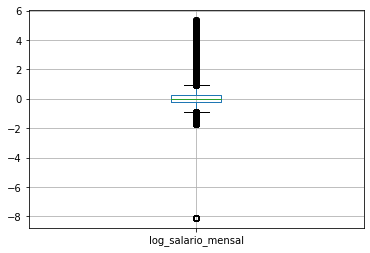

In [ ]:
dados_estudo.boxplot(column='')

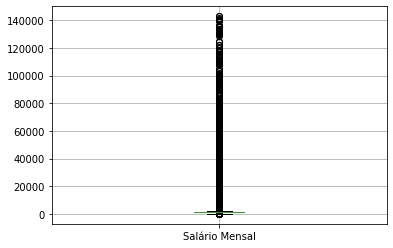

In [ ]:
dados_estudo.boxplot(column='Salário Mensal')

In [ ]:
dados_estudo[dados_estudo['log_salario_mensal']<-Z_score_inf].head()

,Salário Mensal,Idade,Escolaridade,Sexo,raca cor,log_salario_mensal
0,954.0,24,Médio Incompleto,Masculino,PARDA,-0.338373
1,2123.0,31,Médio Incompleto,Masculino,PARDA,0.566779
2,991.0,24,Médio Incompleto,Masculino,PARDA,-0.295330
3,1117.0,18,Médio Incompleto,Masculino,PARDA,-0.159929
4,1050.0,19,Médio Incompleto,Masculino,PARDA,-0.229908


In [ ]:
scipy.stats.norm(mu, std).sf(dados_estudo['log_salario_mensal'].max())

4.85166173483913e-08

In [ ]:
alpha_max = 1-scipy.stats.norm(mu, std).sf(dados_estudo['log_salario_mensal'].max())
alpha_max

0.9999999514833826

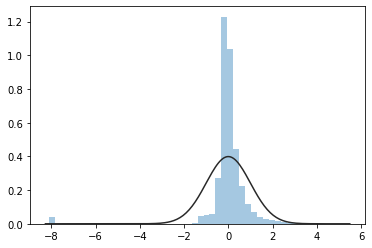

In [ ]:
df_salario = pd.DataFrame(dados_estudo,columns=["log_salario_mensal"]) 
import seaborn as sns
from scipy.stats import norm
ax = sns.distplot(df_salario, fit=norm, kde=False)

In [ ]:
dados_estudo.drop(columns=["Grau Instrução"], inplace=True)

In [ ]:
dados_estudo.head()

,Salário Mensal,Idade,Escolaridade,Sexo,raca cor,log_salario_mensal
0,954.0,24,Médio Incompleto,Masculino,PARDA,-0.338373
1,2123.0,31,Médio Incompleto,Masculino,PARDA,0.566779
2,991.0,24,Médio Incompleto,Masculino,PARDA,-0.295330
3,1117.0,18,Médio Incompleto,Masculino,PARDA,-0.159929
4,1050.0,19,Médio Incompleto,Masculino,PARDA,-0.229908


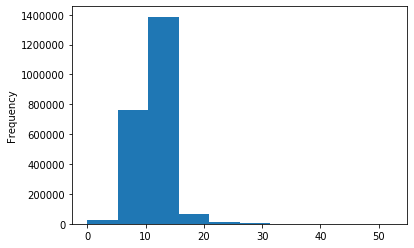

In [ ]:
dados_estudo['cub_salario_mensal'] = ( dados_estudo['Salário Mensal']**(1/3))
dados_estudo['cub_salario_mensal'].plot.hist(bins=10)

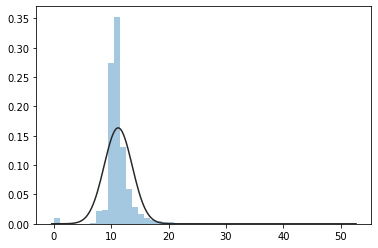

In [ ]:
df_salario = pd.DataFrame(dados_estudo,columns=["cub_salario_mensal"]) 
import seaborn as sns
from scipy.stats import norm
ax = sns.distplot(df_salario, fit=norm, kde=False)

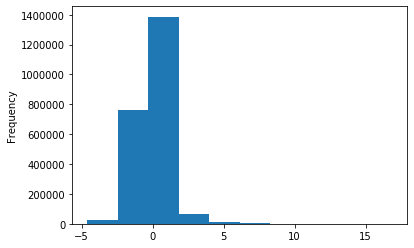

In [ ]:
dados_estudo['cub_salario_mensal']=(dados_estudo['cub_salario_mensal']-dados_estudo['cub_salario_mensal'].mean()) / dados_estudo['cub_salario_mensal'].std()
dados_estudo['cub_salario_mensal'].plot.hist()

In [ ]:
resultado_cub = stats.shapiro(dados_estudo['cub_salario_mensal'])
resultado_cub 

(0.7245348691940308, 0.0)

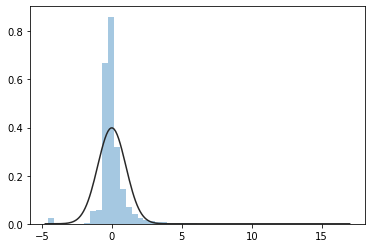

In [ ]:
df_salario = pd.DataFrame(dados_estudo,columns=["cub_salario_mensal"]) 
import seaborn as sns
from scipy.stats import norm
ax = sns.distplot(df_salario, fit=norm, kde=False)

In [ ]:
cubx = dados_estudo['cub_salario_mensal']
# calculando a média
cubmu = np.mean(x)
# calculando o desvio-padrão populacional
cubstd = np.std(x)
#Imprimindo a média e o desvio-padrão
cubmu,cubstd

(1.2577351315012457e-11, 0.9999997784421976)

In [ ]:
scipy.stats.norm.interval(alpha=0.95,loc=cubmu,scale=cubstd)


(-1.9599635502821635, 1.959963550307318)

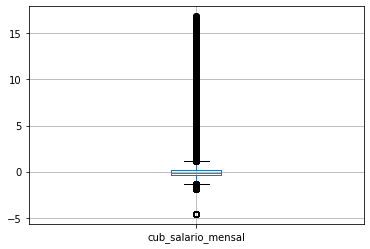

In [ ]:
dados_estudo.boxplot(column='cub_salario_mensal')

In [ ]:
dados_estudo[dados_estudo['cub_salario_mensal']<-1.95].head()


,Salário Mensal,Idade,Escolaridade,Sexo,raca cor,log_salario_mensal,cub_salario_mensal
724,0.0,25,Médio Incompleto,Masculino,PARDA,-8.108356,-4.589584
1901,0.0,49,Médio Incompleto,Masculino,PARDA,-8.108356,-4.589584
1990,0.0,27,Médio Incompleto,Masculino,PARDA,-8.108356,-4.589584
1992,0.0,27,Médio Incompleto,Masculino,PARDA,-8.108356,-4.589584
2017,0.0,22,Médio Incompleto,Masculino,PARDA,-8.108356,-4.589584


In [ ]:
dados_estudo[dados_estudo['cub_salario_mensal']>1.95].head()


,Salário Mensal,Idade,Escolaridade,Sexo,raca cor,log_salario_mensal,cub_salario_mensal
558,5292.0,38,Médio Incompleto,Masculino,PARDA,1.600727,2.553622
595,5492.0,36,Médio Incompleto,Masculino,PARDA,1.642725,2.642499
752,6407.0,32,Médio Incompleto,Masculino,PARDA,1.817192,3.023690
761,5148.0,47,Médio Incompleto,Masculino,PARDA,1.569493,2.488234
1008,16900.0,27,Médio Incompleto,Masculino,PARDA,2.915392,5.929602


In [ ]:
dados_estudo.loc[dados_estudo['Salário Mensal']>100000]

,Salário Mensal,Idade,Escolaridade,Sexo,raca cor,log_salario_mensal,cub_salario_mensal
29558,101500.0,24,Médio Incompleto,Masculino,PARDA,4.945383,14.531327
29560,110000.0,27,Médio Incompleto,Masculino,PARDA,5.036449,15.050837
37454,121836.0,20,Médio Incompleto,Masculino,PARDA,5.152171,15.731418
161015,109720.0,25,Médio Completo,Masculino,PARDA,5.033563,15.034158
245583,130000.0,40,Médio Completo,Masculino,PARDA,5.225614,16.175531
270812,110000.0,26,Médio Completo,Masculino,PARDA,5.036449,15.050837
270814,130000.0,24,Médio Completo,Masculino,PARDA,5.225614,16.175531
270816,120000.0,30,Médio Completo,Masculino,PARDA,5.134977,15.628825
293149,135809.0,40,Médio Completo,Masculino,PARDA,5.275115,16.480329
312901,108243.0,25,Médio Completo,Masculino,PARDA,5.018216,14.945705


# Variavel Idade 

Calculando dados com relação a variavel idade:

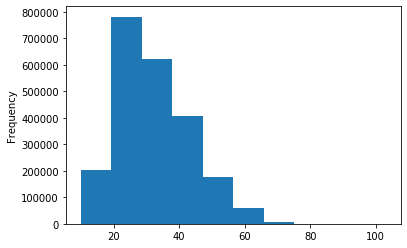

In [ ]:
dados_estudo['Idade'].plot.hist()

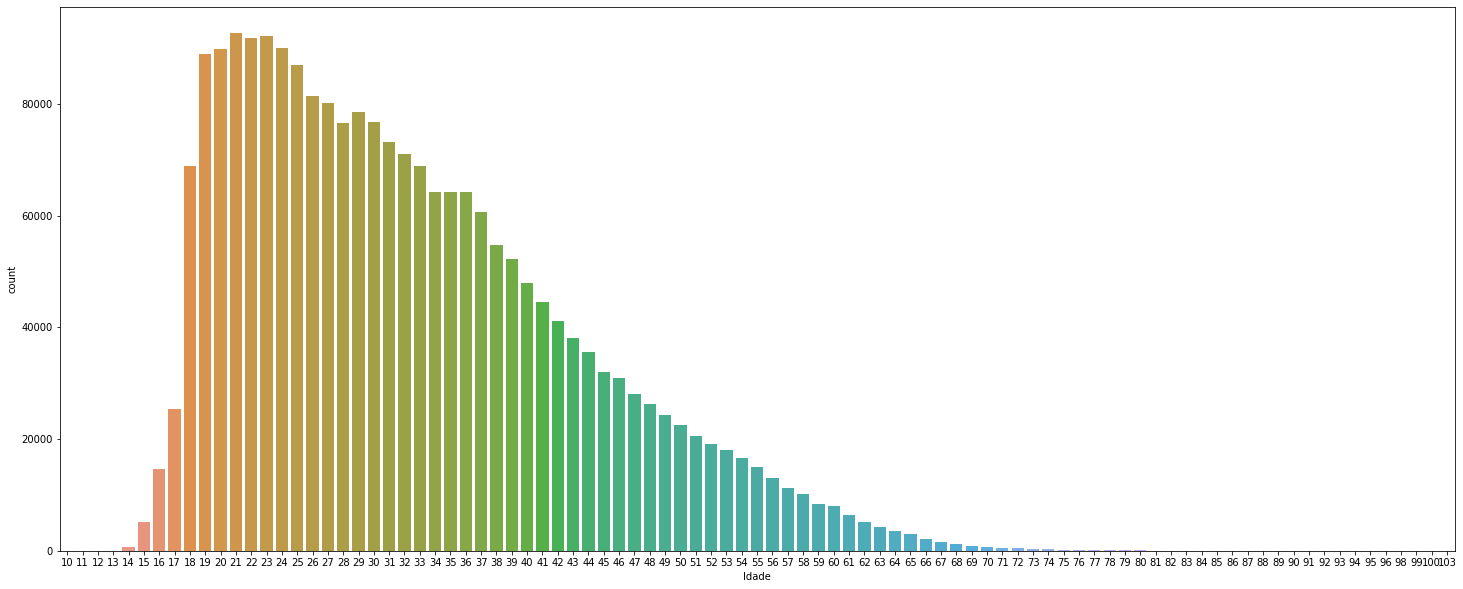

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,10))
sns.countplot(dados_estudo['Idade'])
plt.show()

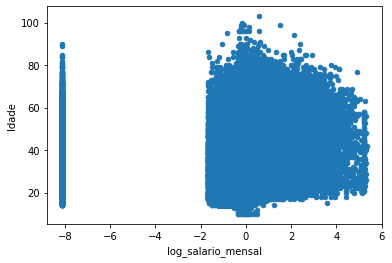

In [ ]:
dados_estudo.plot.scatter(y='Idade',x='log_salario_mensal',s = None,alpha=0.99)



In [ ]:
x = dados_estudo['Idade']
# calculando a média
idm = np.mean(x)
# calculando o desvio-padrão populacional
idstd = np.std(x)
#Imprimindo a média e o desvio-padrão valor min e maximo da variavel estudada
print ("Media:",idm, "E desvio Padrão:",idstd)
print("Idade Min:", dados_estudo['Idade'].min())
print("Idade Max:", dados_estudo['Idade'].max())

Media: 32.314226374896315 E desvio Padrão: 10.96018699385759
Idade Min: 10
Idade Max: 103


In [ ]:
dados_estudo['log_salario_mensal'].cov(dados_estudo['Idade'])

1.5138797417106726

In [ ]:
dados_estudo['log_salario_mensal'].corr(dados_estudo['Idade'])

0.13812532643329714

# Grau de Instrução 

Realizando estudos para verificação da variavel com relação a faixa salarial e idade

In [ ]:
#pd.merge(dados_limpo, grau_instrucao, left_on='Grau Instrução', right_on='codigo')

dados_estudo = dados_estudo.merge(grau_instrucao, left_on='Grau Instrução', right_on='codigo')

In [ ]:
dados_estudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256752 entries, 0 to 2256751
Data columns (total 8 columns):
Salário Mensal         float64
Idade                  int64
Raça Cor               int64
Grau Instrução         int64
Sexo                   int64
Salario_Normalizado    float64
Idade_Normalizada      float64
Escolaridade           object
dtypes: float64(3), int64(4), object(1)
memory usage: 155.0+ MB


In [ ]:
dados_estudo.drop(columns=["codigo"], inplace=True)

In [ ]:
dados_estudo.rename(columns={'descricao': 'Escolaridade'}, inplace=True)

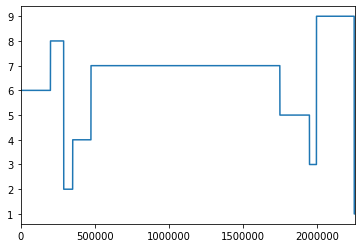

In [ ]:
dados_estudo['Grau Instrução'].plot()

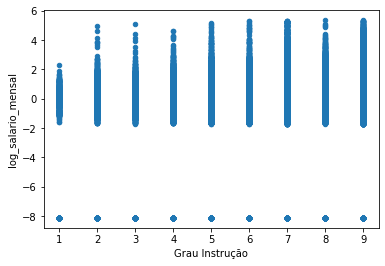

In [ ]:
dados_estudo.plot.scatter(x='Grau Instrução',y='log_salario_mensal')  

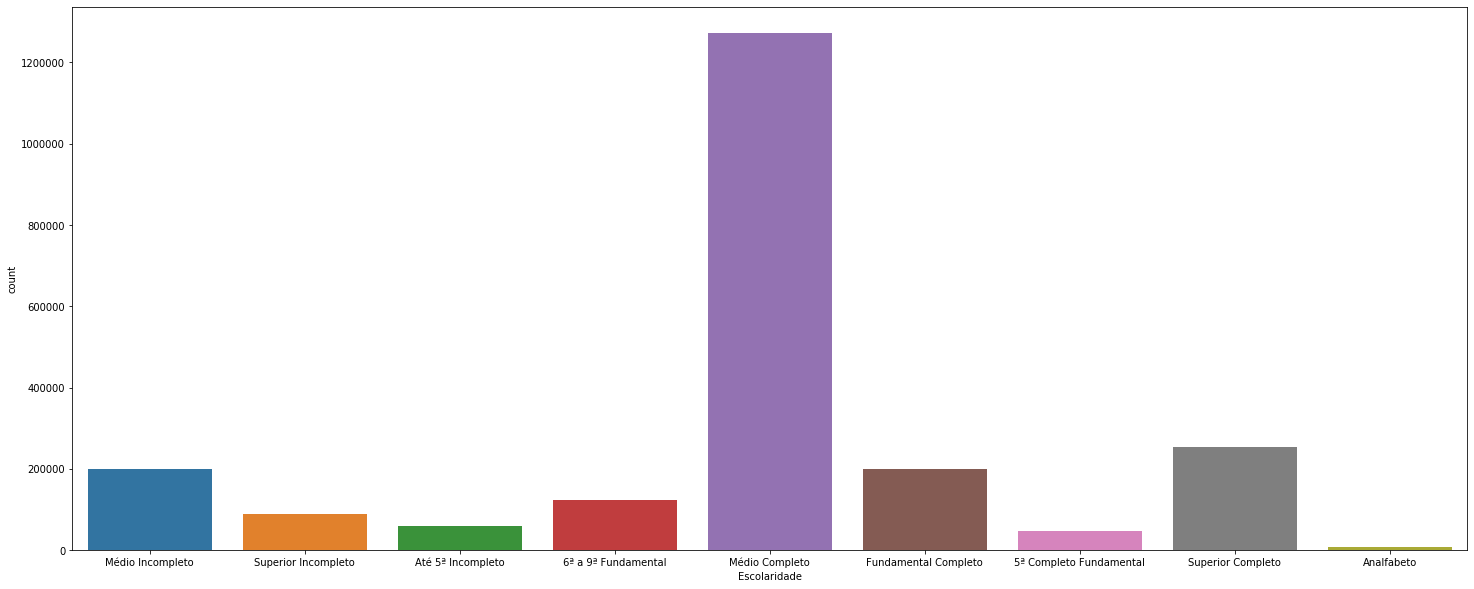

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,10))
sns.countplot(dados_estudo['Escolaridade'])
plt.show()

In [ ]:
dados_estudo['Grau Instrução'].mean()

6.595547494806696

In [ ]:
dados_estudo[dados_estudo['log_salario_mensal']<-1.95]['Escolaridade'].value_counts()


Médio Completo             10528
Superior Completo           7436
Médio Incompleto            1733
Fundamental Completo        1522
6ª a 9ª Fundamental          909
Superior Incompleto          850
Até 5ª Incompleto            670
5ª Completo Fundamental      480
Analfabeto                   117
Name: Escolaridade, dtype: int64

In [ ]:
dados_estudo[dados_estudo['log_salario_mensal']>1.95]['Escolaridade'].value_counts()


Superior Completo          25488
Médio Completo              3123
Superior Incompleto          692
Médio Incompleto             308
Fundamental Completo         305
6ª a 9ª Fundamental          112
Até 5ª Incompleto             43
5ª Completo Fundamental       37
Analfabeto                     1
Name: Escolaridade, dtype: int64

# Variavel Raça Cor 



In [ ]:
dados_estudo = dados_estudo.merge(raca_cor, left_on='Raça Cor', right_on='codigo')

In [ ]:
dados_estudo.drop(columns=["codigo"], inplace=True)

In [ ]:
dados_estudo.head()

,Salário Mensal,Idade,Raça Cor,Grau Instrução,Salario_Normalizado,Idade_Normalizada,Escolaridade,Sexo,Categoria,raca cor
0,954.0,24,8,6,-1.324958,-0.601439,Médio Incompleto,Masculino,1,PARDA
1,2123.0,31,8,6,1.171267,0.058999,Médio Incompleto,Masculino,1,PARDA
2,991.0,24,8,6,-1.035790,-0.601439,Médio Incompleto,Masculino,1,PARDA
3,1117.0,18,8,6,-0.455640,-1.805023,Médio Incompleto,Masculino,1,PARDA
4,1050.0,19,8,6,-0.739737,-1.475269,Médio Incompleto,Masculino,1,PARDA


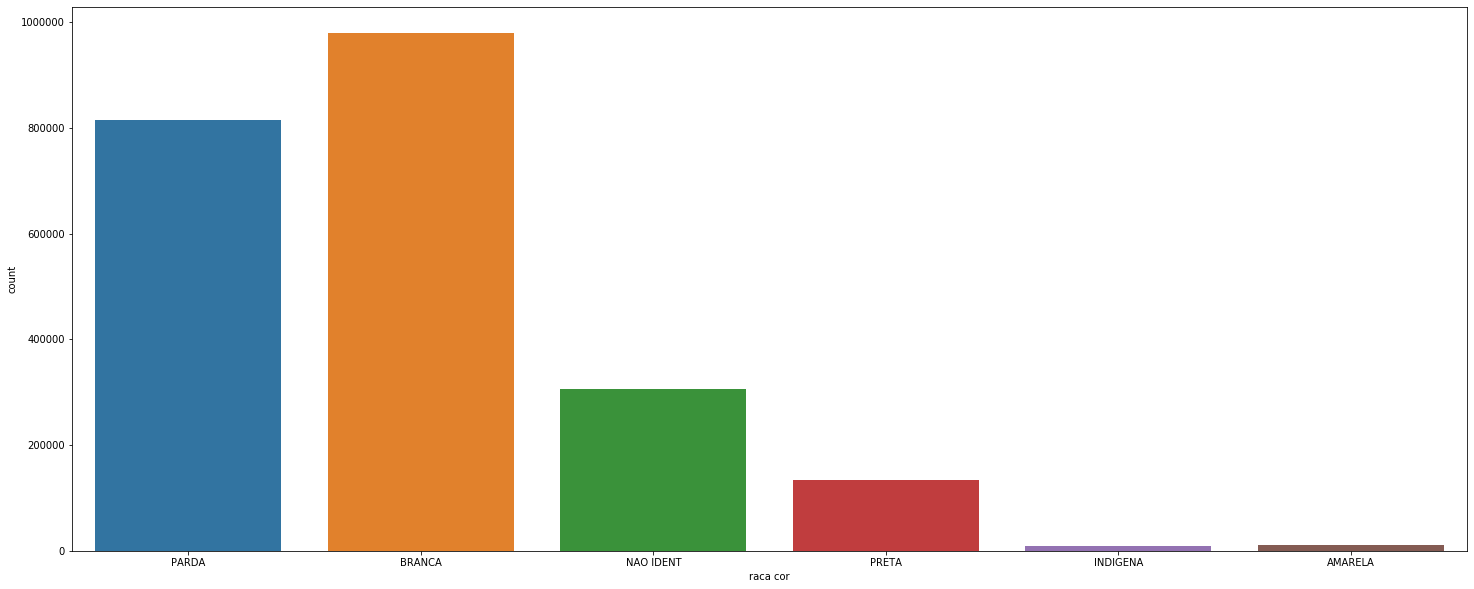

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(dados_estudo['raca cor'])
plt.show()

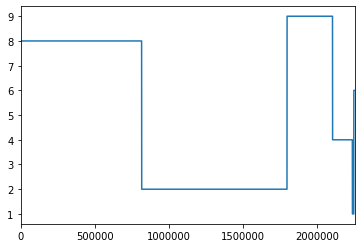

In [ ]:
dados_estudo['Raça Cor'].plot()

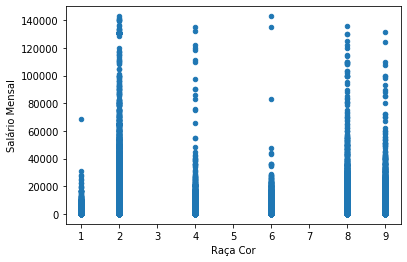

In [ ]:
dados_estudo.plot.scatter(x='Raça Cor',y='Salário Mensal')